# Importing Libraries

In [1]:
#Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Loading and Exploring the Data

In [3]:
#Importing the datasets
energy_df = pd.read_csv('data/energy_dataset.csv')
weather_df = pd.read_csv('data/weather_features.csv')

#Split the time column into date and time
energy_df['Date'] = energy_df['time'].apply(lambda x: x.split(' ')[0])
energy_df['Hour'] = energy_df['time'].apply(lambda x: x.split(' ')[1].split(':')[0])
weather_df['Date'] = weather_df['dt_iso'].apply(lambda x: x.split(' ')[0])
weather_df['Hour'] = weather_df['dt_iso'].apply(lambda x: x.split(' ')[1].split(':')[0])

#Combine the date and time columns
energy_df['time'] = energy_df['Date'] + ' ' + energy_df['Hour']
energy_df['time'] = pd.to_datetime(energy_df['time'], format='%Y-%m-%d %H')
weather_df['dt_iso'] = weather_df['Date'] + ' ' + weather_df['Hour']
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], format='%Y-%m-%d %H')

#Drop the date and hour columns
energy_df.drop(['Date', 'Hour'], axis=1, inplace=True)
weather_df.drop(['Date', 'Hour'], axis=1, inplace=True)

#time column to index
energy_df.set_index('time', inplace=True)
weather_df.set_index('dt_iso', inplace=True)

In [5]:
energy_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
weather_df.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## Plotting the Data

### Energy Dataset

In [60]:
#List of columns of the energy dataset
print('The columns of the energy dataset are: \n')
print(energy_df.columns, '\n')

The columns of the energy dataset are: 

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object') 



array([<AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>],
      dtype=object)

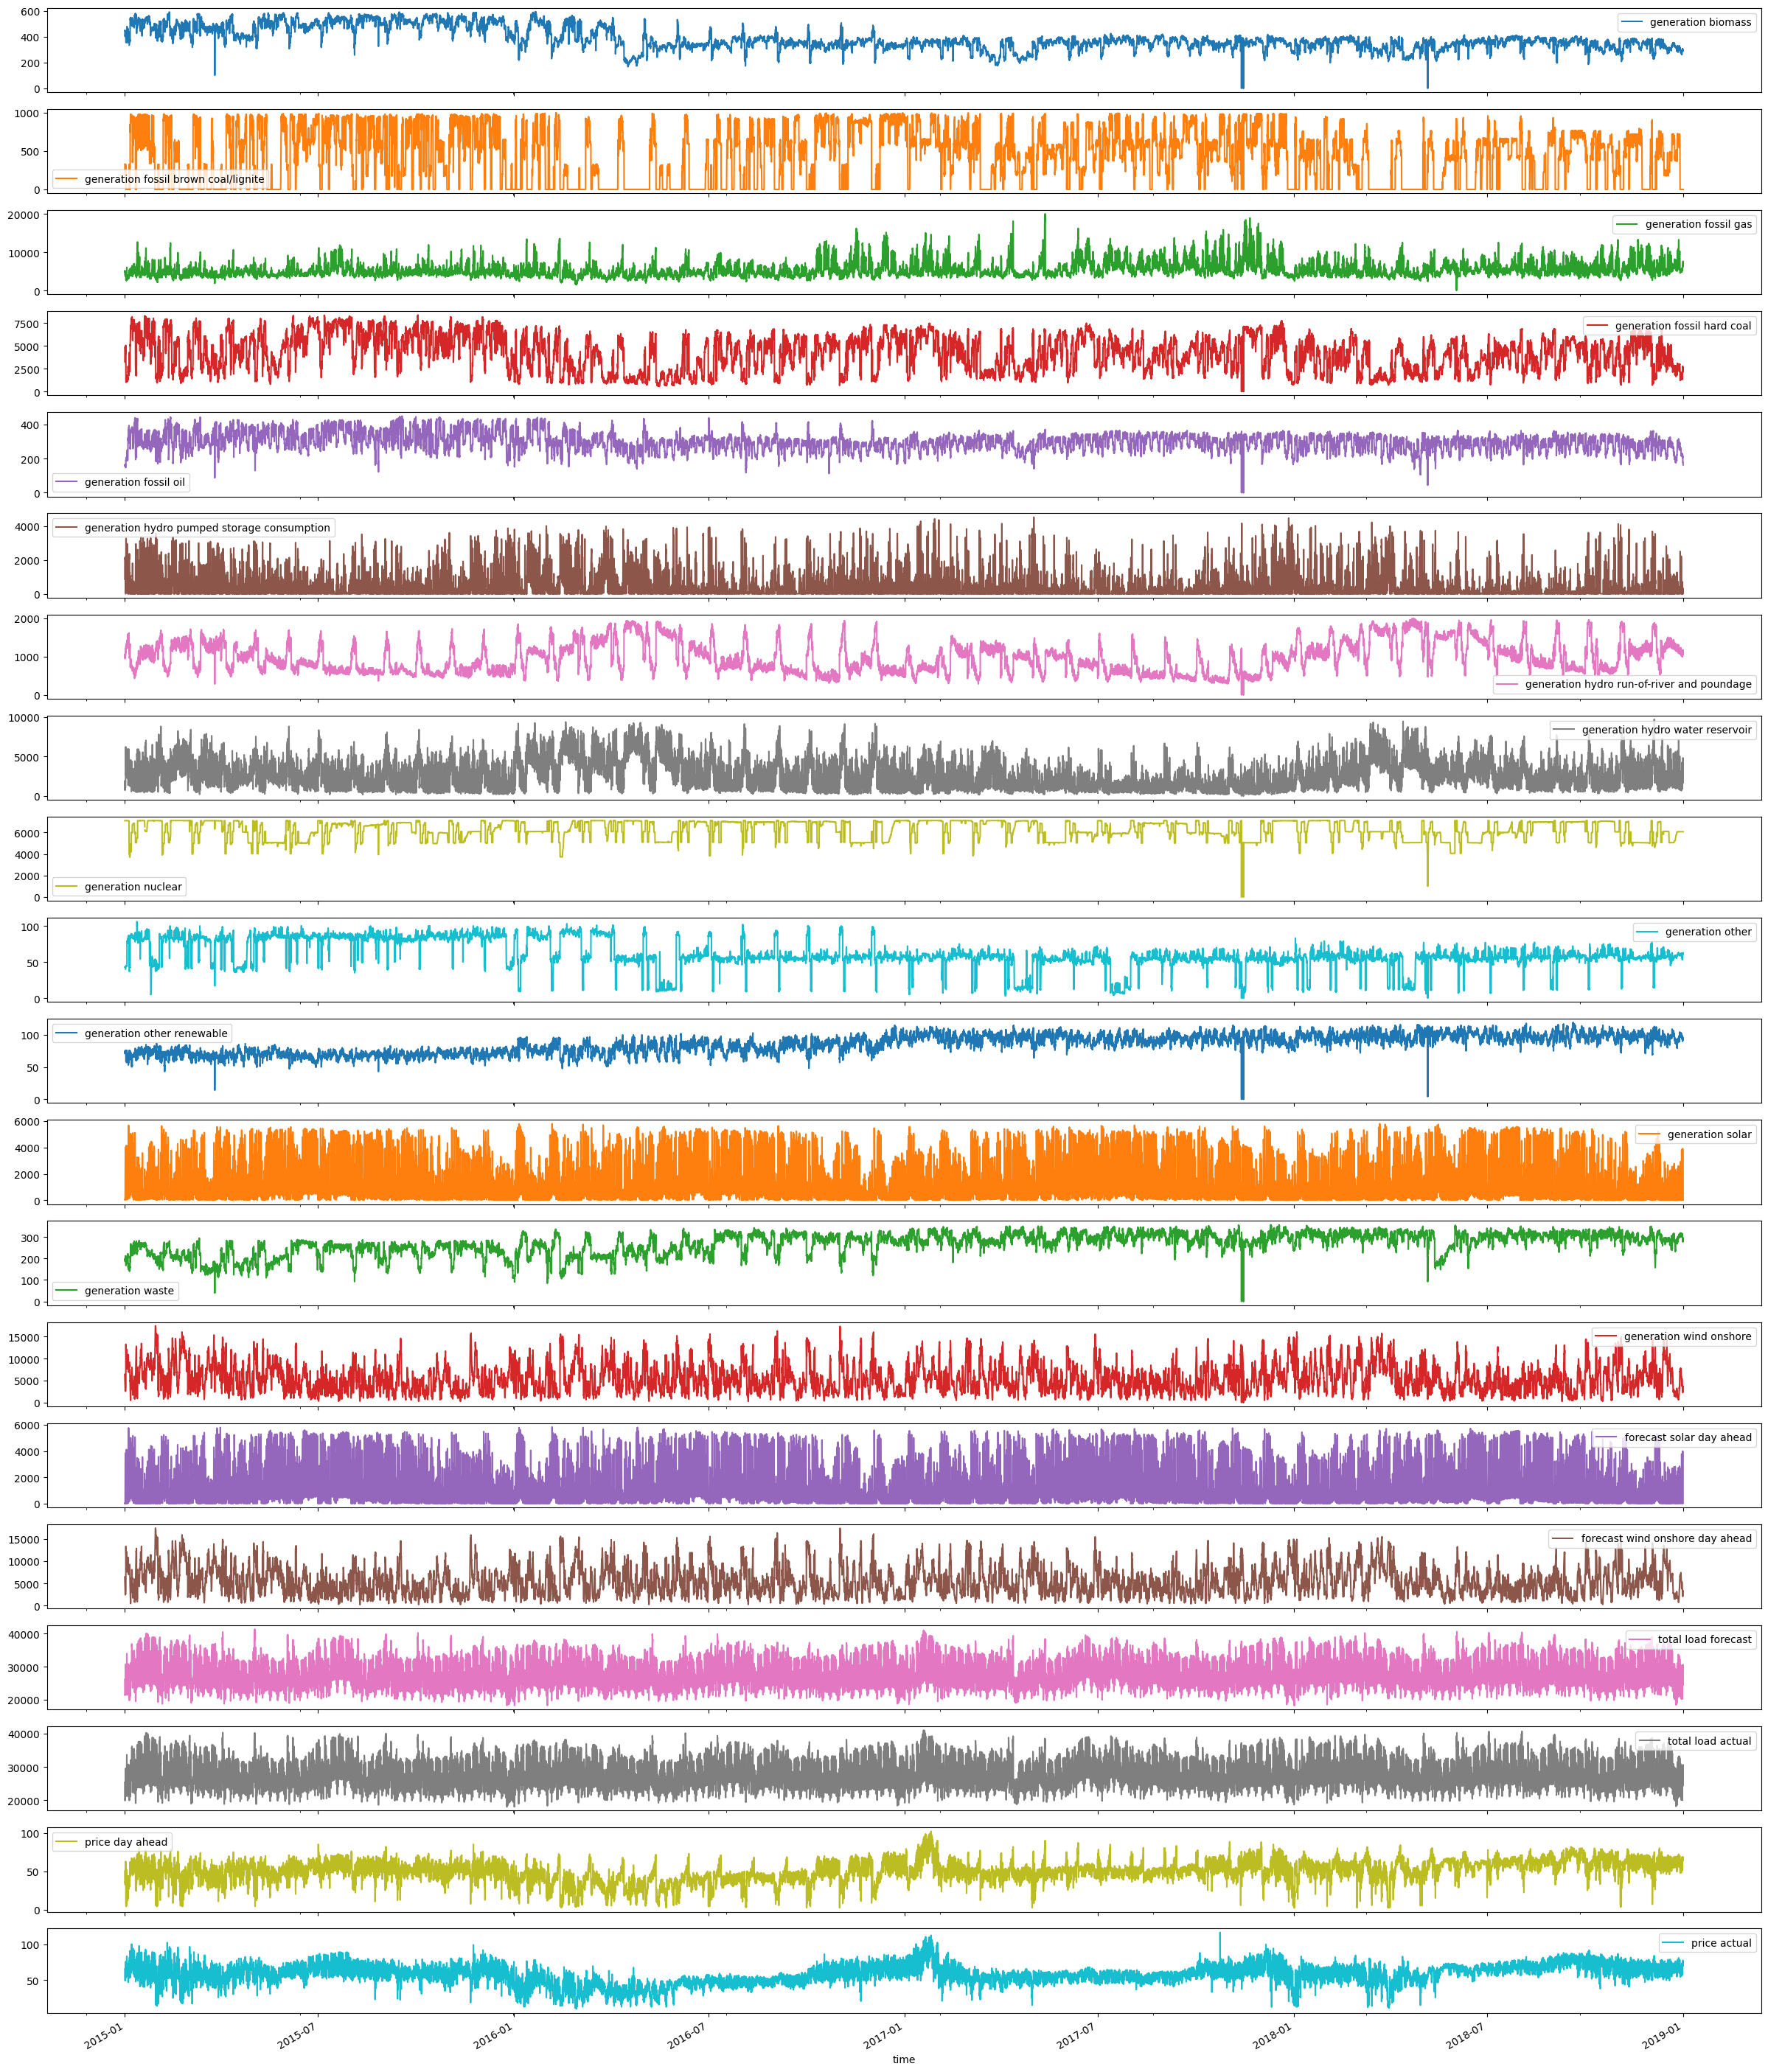

In [57]:
#Plotting the energy dataset
energy_df.plot(subplots=True, figsize=(30, 40))

We remark that we do not have data for these data : 
- **generation hydro pumped storage aggregated**
- **forecast wind offshore eday ahead**

On the other hand, we notice that their are data for which there is only zeros.

In [32]:
#the columns of the energy dataset for which the percentage of missing values is equal to 100%
print('The columns of the energy dataset for which the percentage of missing values is equal to 100% are: \n')
print(energy_df.columns[energy_df.isnull().mean()==1].to_list(), '\n')

The columns of the energy dataset for which the percentage of missing values is equal to 100% are: 

['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'] 



In [55]:
#columns for which data is only zeros
print('Columns for which data is only zeros are:')
energy_df.columns[(energy_df.sum() == 0)].to_list()

Columns for which data is only zeros are:


['generation fossil coal-derived gas',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation marine',
 'generation wind offshore']

## Weather Dataset

In [61]:
#List of columns of the weather dataset
print('The columns of the weather dataset are: \n')
print(weather_df.columns, '\n')

The columns of the weather dataset are: 

Index(['city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon'],
      dtype='object') 



array([<AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>,
       <AxesSubplot: xlabel='dt_iso'>, <AxesSubplot: xlabel='dt_iso'>],
      dtype=object)

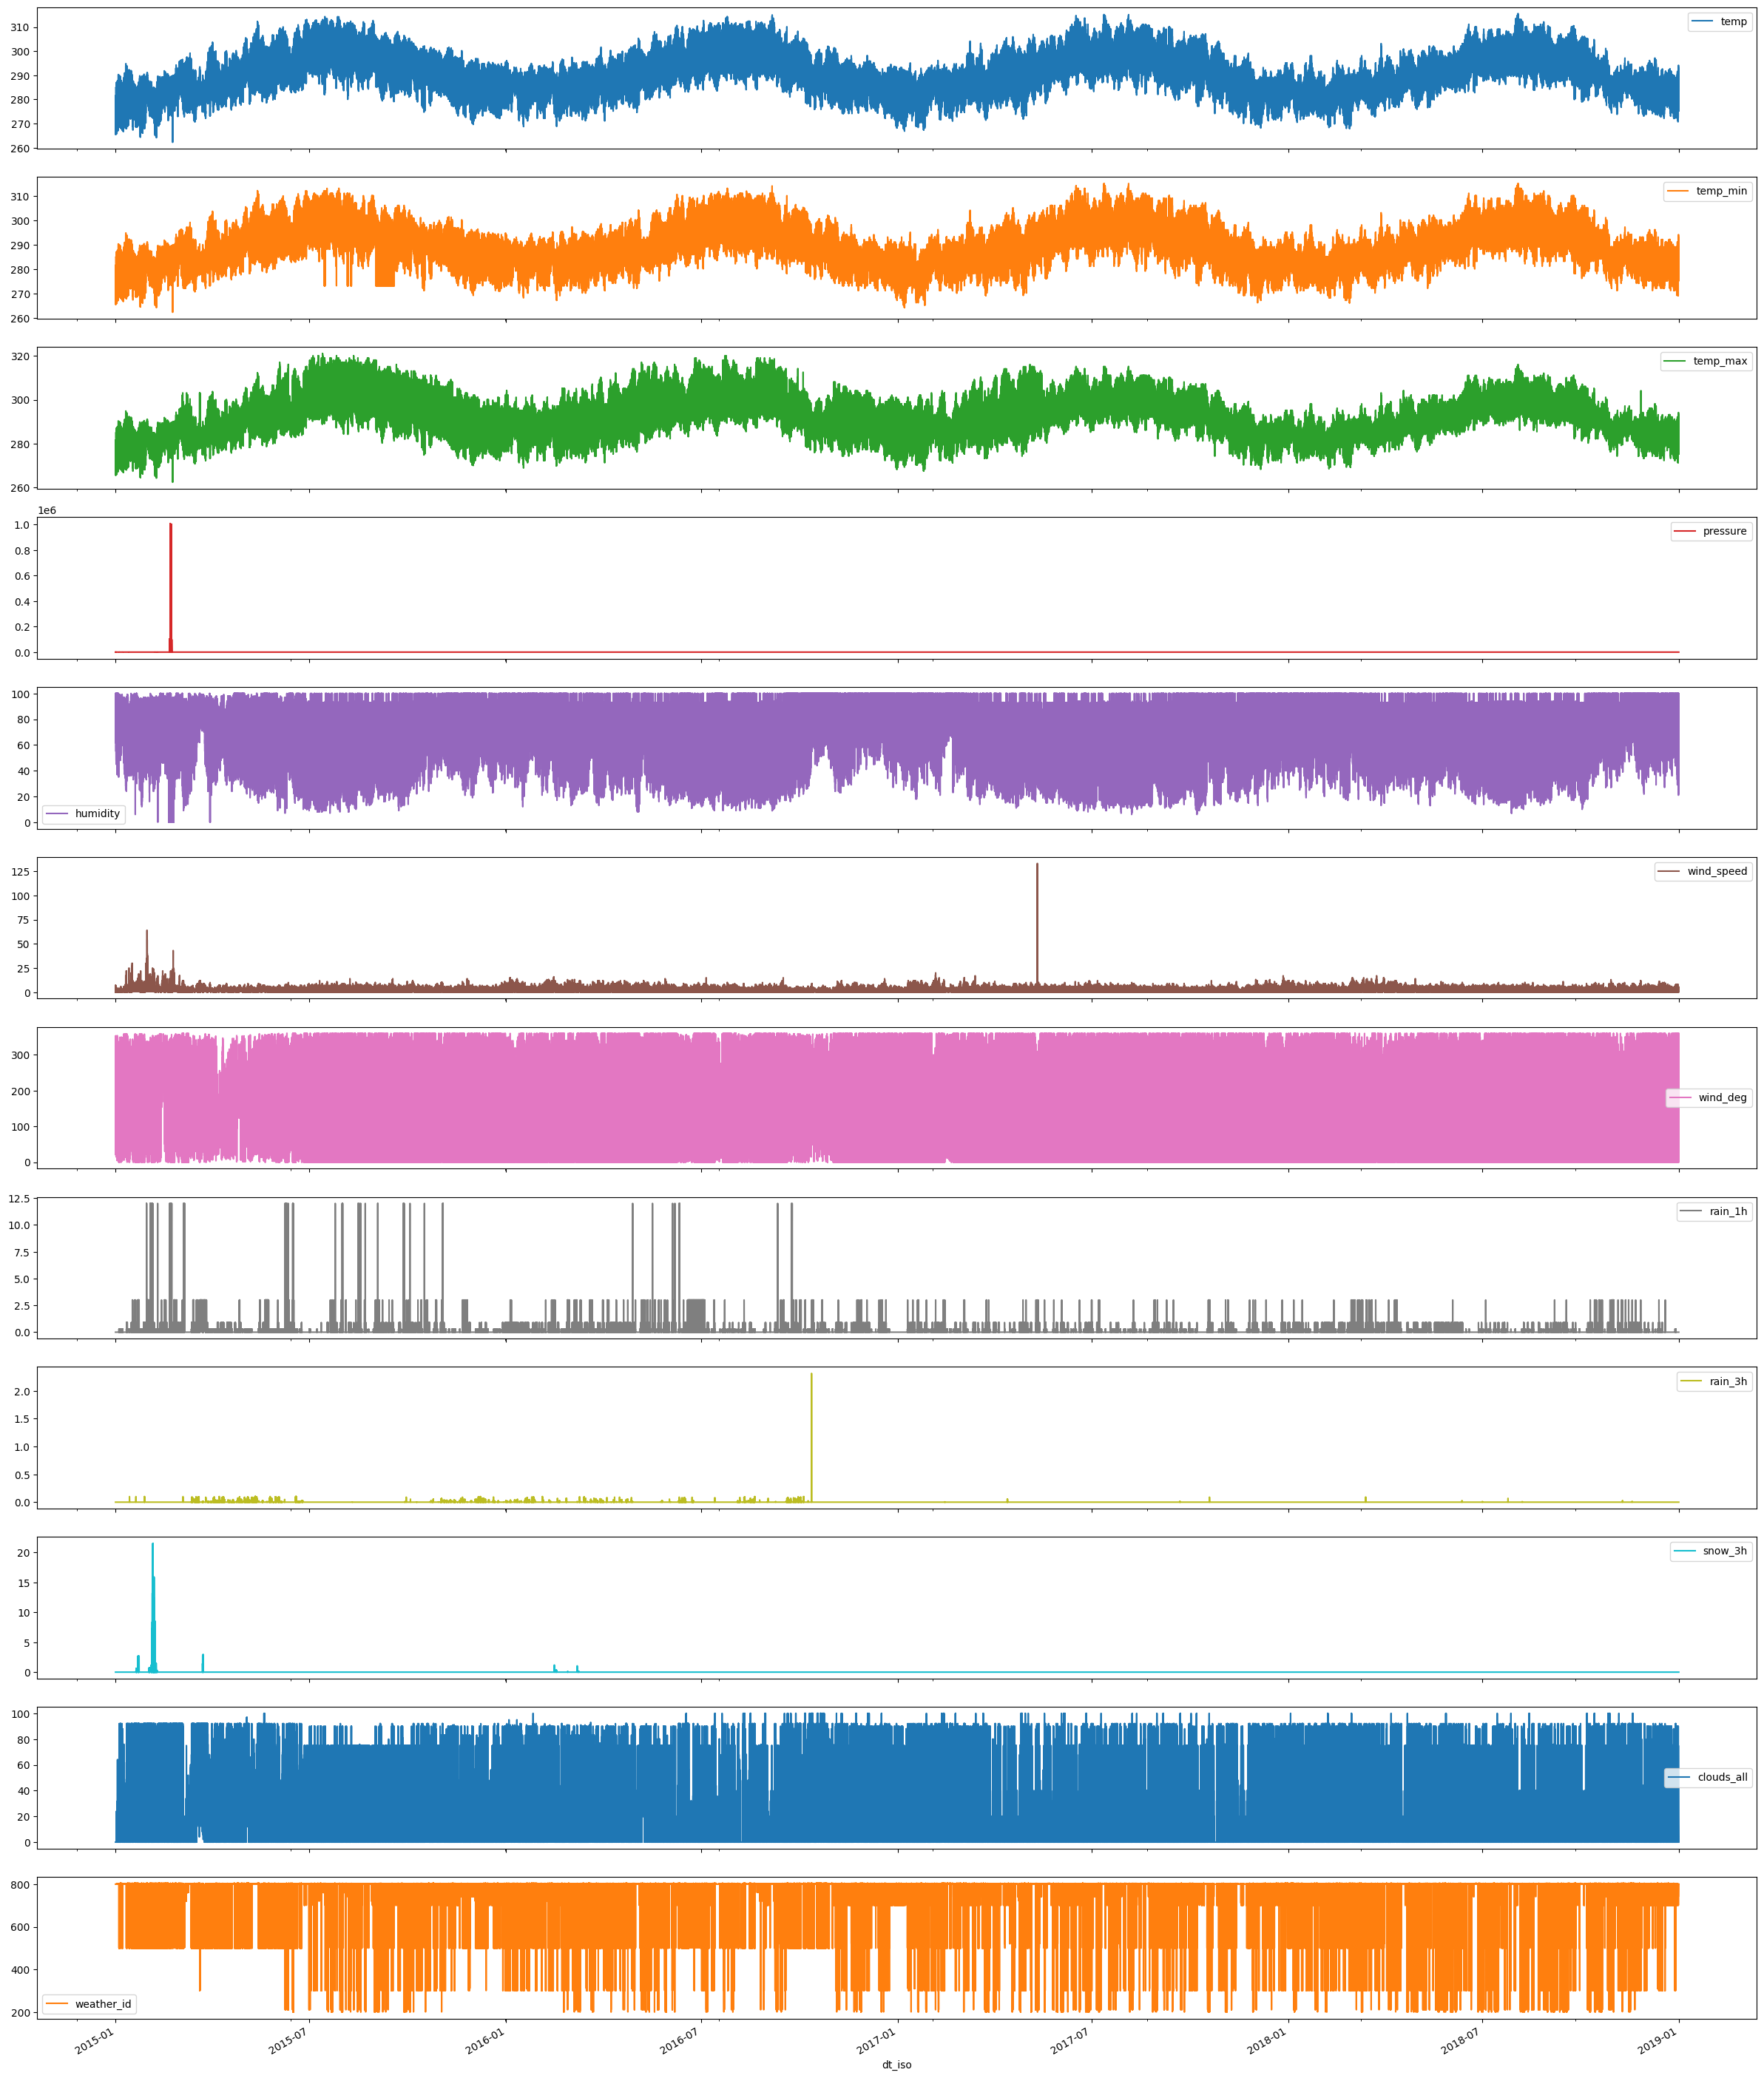

In [62]:
#Plotting the weather dataset
weather_df.plot(subplots=True, figsize=(30, 40))

We remark that some data of the weather dataset have visible outliers. We will deal with them later.
- **pressure**
- **wind_speed**
- **rain_3h**

## Exploring fossil gas data 

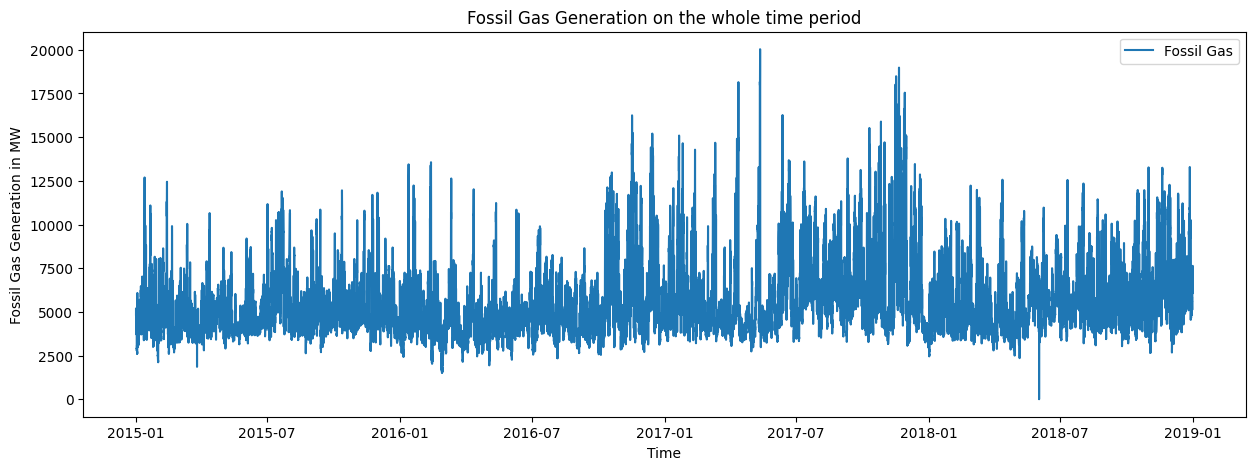

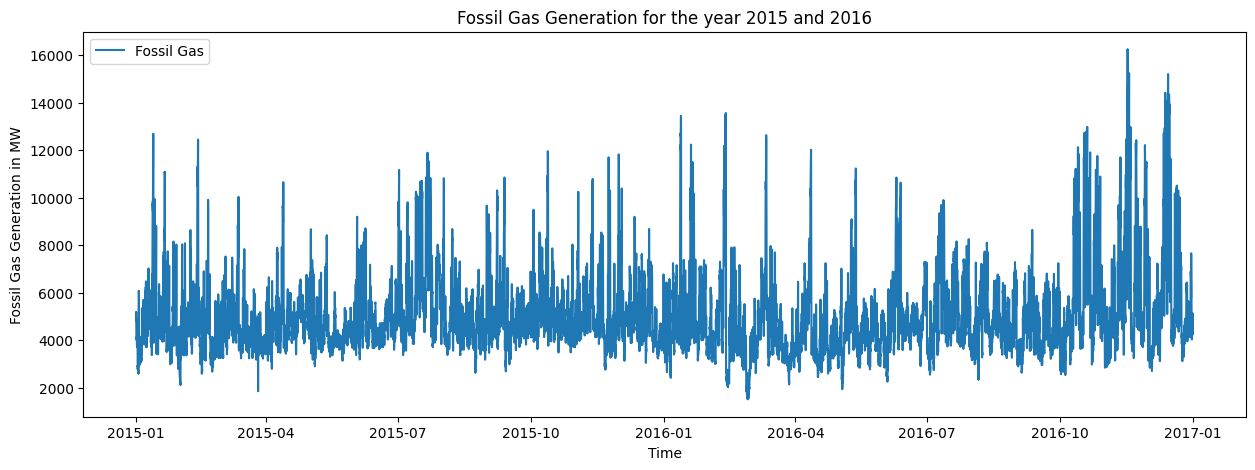

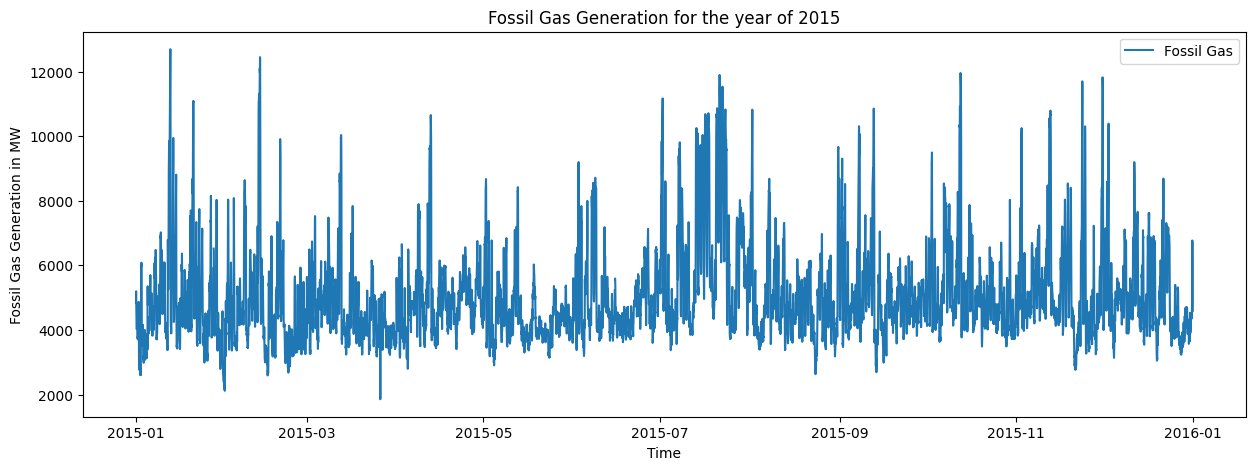

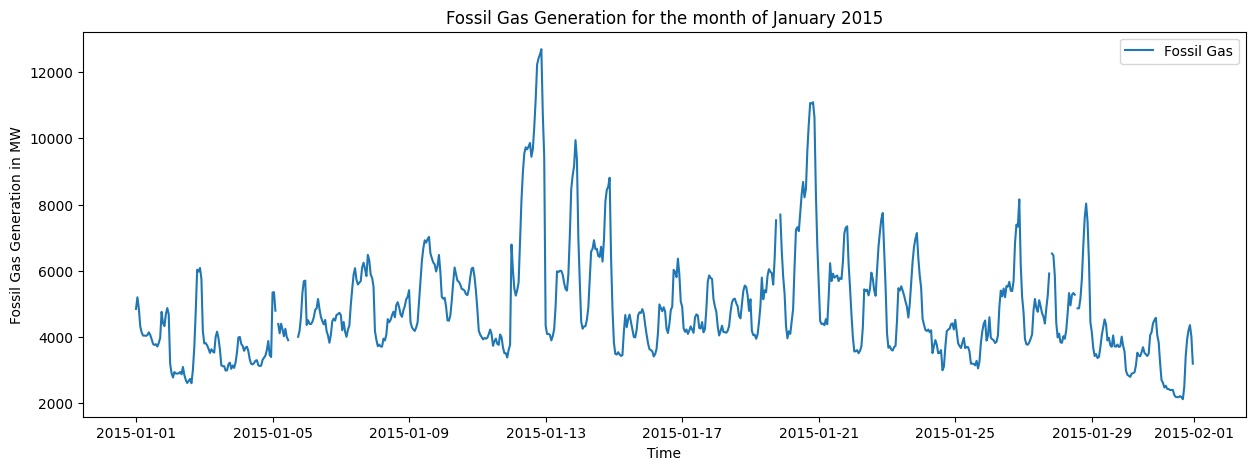

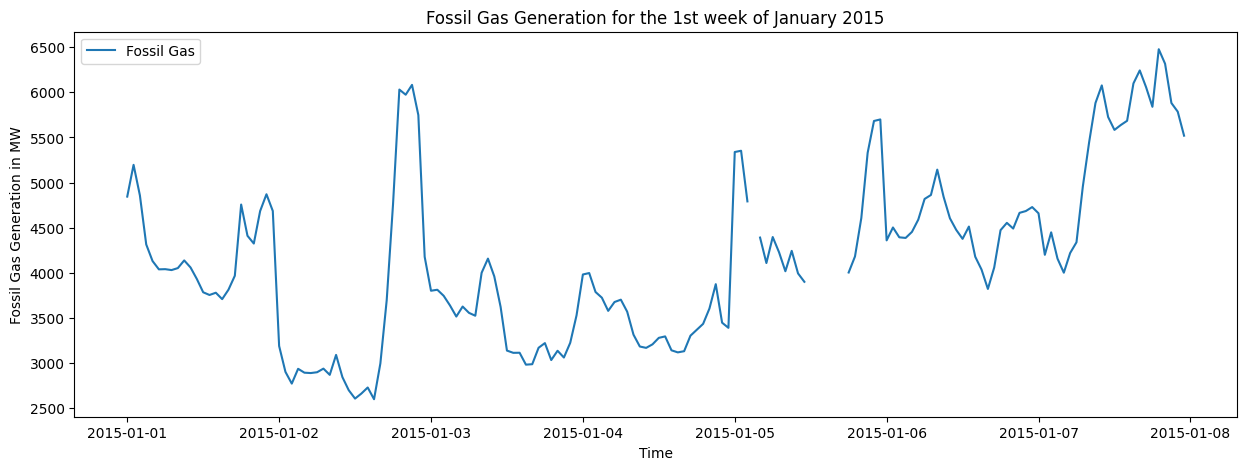

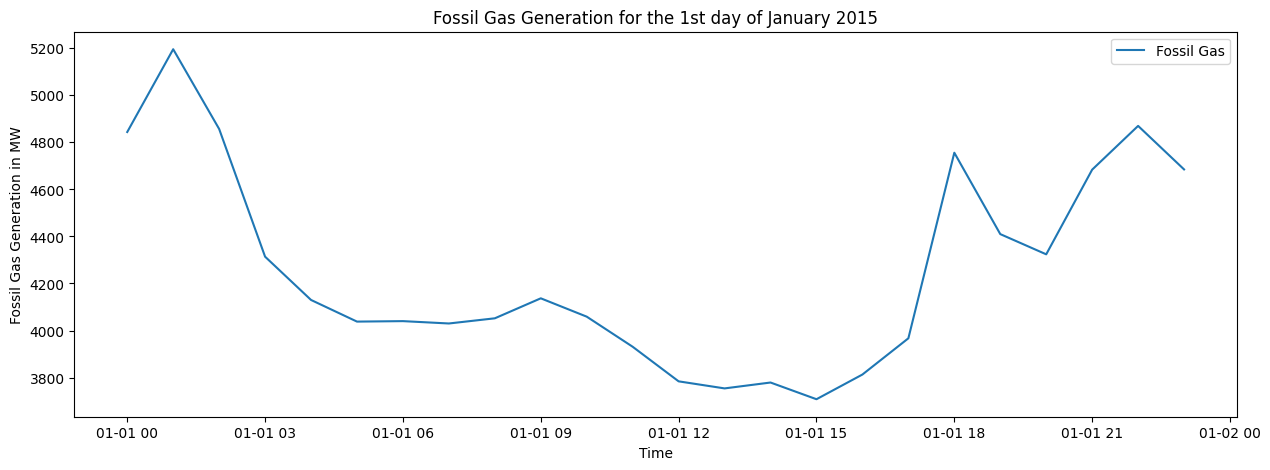

In [19]:
#Plotting Gas Generation on the whole time period
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas'], label='Fossil Gas')
plt.title('Fossil Gas Generation on the whole time period')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the year 2015 and 2016
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas']['2015':'2016'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the year 2015 and 2016')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the year of 2015
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-12-31'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the year of 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the month of January 2015
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-31'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the month of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the 1st week of January 2015
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-07'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the 1st week of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

#Plotting Gas Generation for the 1st day of January 2015
plt.figure(figsize=(15, 5))
plt.plot(energy_df['generation fossil gas']['2015-01-01':'2015-01-01'], label='Fossil Gas')
plt.title('Fossil Gas Generation for the 1st day of January 2015')
plt.xlabel('Time')
plt.ylabel('Fossil Gas Generation in MW')
plt.legend()

plt.show()

# Data Cleaning and Preprocessing

We decide to drop from the energy dataframe columns that: 
- are empty
- have only zero values

In [56]:
#dropping the columns of the energy dataset for which the percentage of missing values is equal to 100%
energy_df.drop(energy_df.columns[energy_df.isnull().mean()==1].to_list(), axis=1, inplace=True)

#dropping columns of energy dataset that have only zeros
zeros_columns = energy_df.columns[(energy_df.sum() == 0)].to_list()
energy_df.drop(zeros_columns, axis=1, inplace=True)